# Heart-Disease Classification

## Dataset

#### Attribute Information:
#### The dataset has 14 attributes
------------------------

-- 1. age: age in years

-- 2. sex: sex (1 = male; 0 = female)

-- 3. cp: chest pain type ((Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic))

-- 4. trestbps: resting blood pressure mm Hg on admission to the hospital.

-- 5. chol: serum cholesterol in mg/dl

-- 6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

-- 7. restecg: resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable 
or definite left ventricular hypertrophy).

-- 8. thalach: maximum heart rate achieved

-- 9. exang: exercise induced angina (1 = yes; 0 = no)

-- 10. oldpeak: ST depression induced by exercise relative to rest

-- 11. slope: the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping)

-- 12. ca: number of major vessels (0-3) colored by flourosopy

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

-- 14. target: heart disease (1 = no, 2 = yes)

## Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
import pickle

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

## Data Exploration

In [2]:
#Reading the data in a dataframe
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.shape

(270, 14)

#### The dataset contains 14 columns, 5 are numerical and 9 are categorical. Also there are no null values in dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [7]:
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

#### There is a good proportion between the two positive and negative cases

In [8]:
#Percent of people having and not having a heart disease
df['target'].value_counts()/df.shape[0]*100 

1    55.555556
2    44.444444
Name: target, dtype: float64

#### 56% people in the dataset have a heart disease

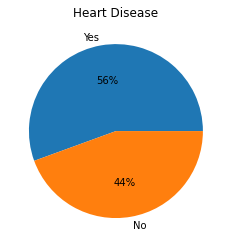

In [9]:
labels = ['Yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

## Exploratory Data Analysis (EDA)

#### Correlation Matrix

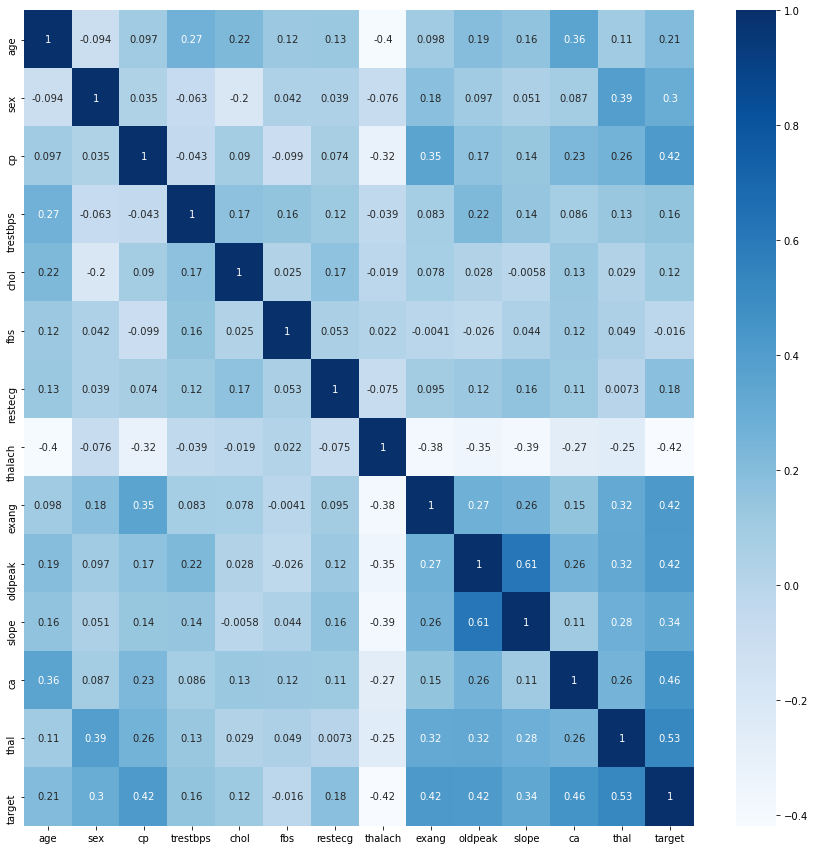

In [4]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

#### Next Steps:
    1. Explore the attributes and correlation between them. 
    2. Build, train and test a model based on the correlated attributes.
    3. Host the flask web application of our Heart Disease Classification.

### Age 

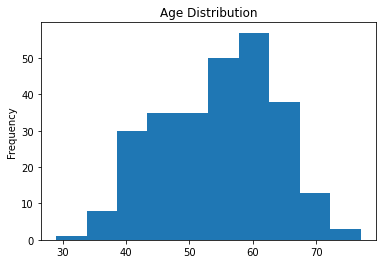

In [11]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [12]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43333333333333


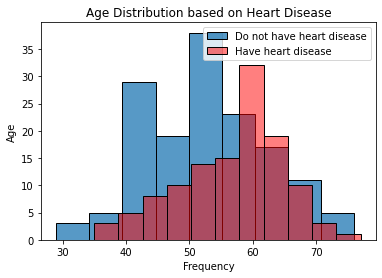

In [21]:
# Display age distribution based on heart disease
sns.histplot(df[df['target'] == 1]['age'], label='Do not have heart disease')
sns.histplot(df[df['target'] == 2]['age'], label = 'Have heart disease', color='red', alpha = 0.5)
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [22]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [23]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(df[df['target'] == 2]['age']))
print('Max age of people who have heart disease: ', max(df[df['target'] == 2]['age']))
print('Average age of people who have heart disease: ', df[df['target'] == 2]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


### Gender Exploration

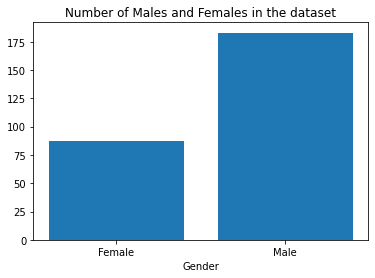

In [24]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

### Chest Pain Types

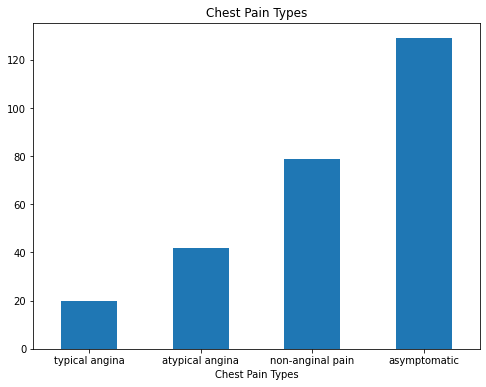

In [25]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

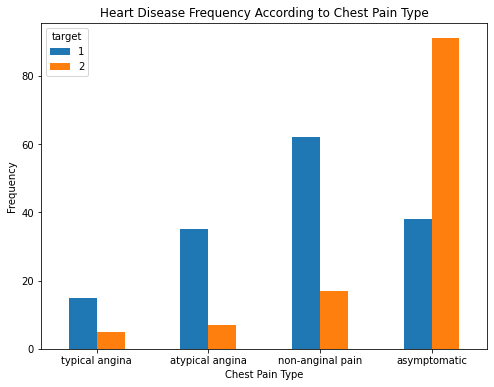

In [26]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### It is evident that most people with heart disease have asymptomatic chest pain

### Blood Pressure 

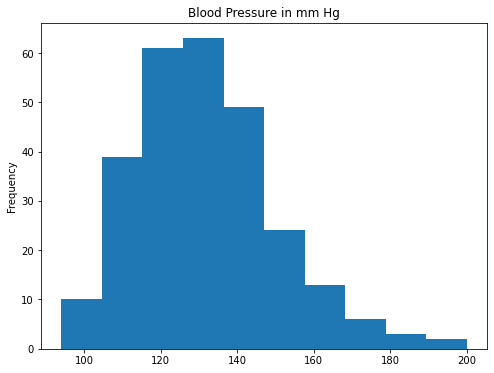

In [27]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

In [30]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [31]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 2]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 2]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 2]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.44166666666666


### Cholestrol

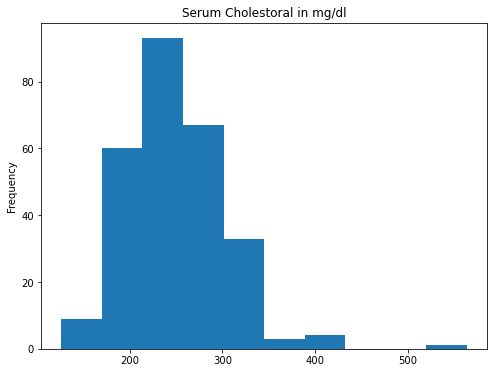

In [32]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

In [33]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 1]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  244.21333333333334


In [34]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 2]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 2]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 2]['chol'].mean())

Min cholestoral of people who have heart disease:  149
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  256.46666666666664


### Fasting Blood Sugar

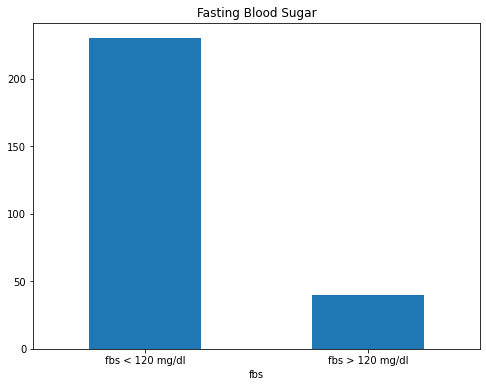

In [35]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

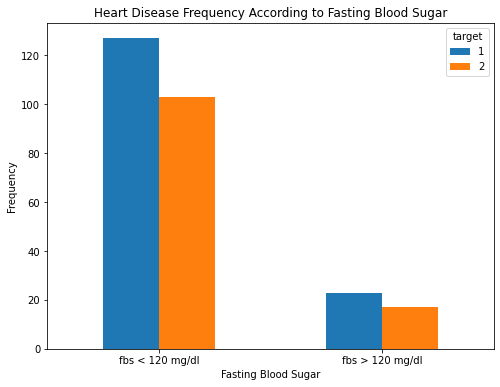

In [36]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Electrocardiographic Results

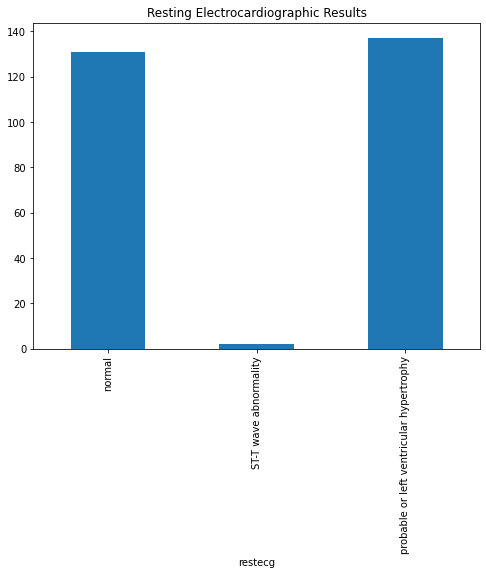

In [37]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

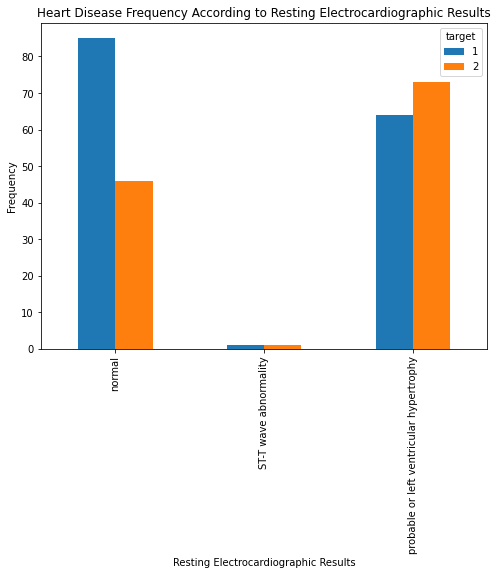

In [38]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

####  The people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy

### Maximum Heart Rate

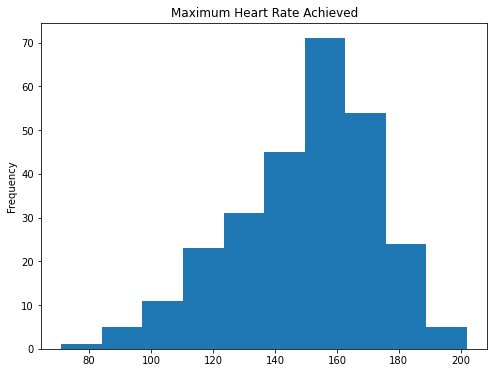

In [39]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

In [40]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  96
Max resting blood pressure of people who do not have heart disease:  202
Average resting blood pressure of people who do not have heart disease:  158.33333333333334


In [41]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['target'] == 2]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(df[df['target'] == 2]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', df[df['target'] == 2]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  71
Max maximum heart rate people who have heart disease:  195
Average maximum heart rate of people who have heart disease:  138.85833333333332


#### The people who have heigh heart rate greater than 150 are more likely to have heart disease.

### Exercise Induced Angina

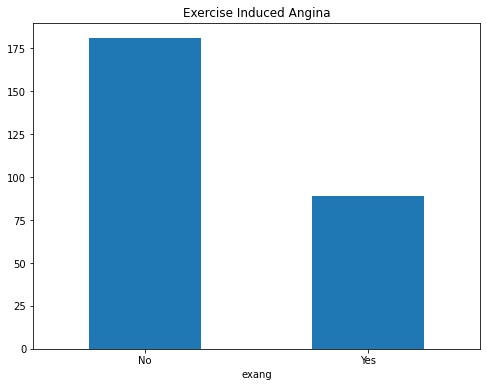

In [5]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

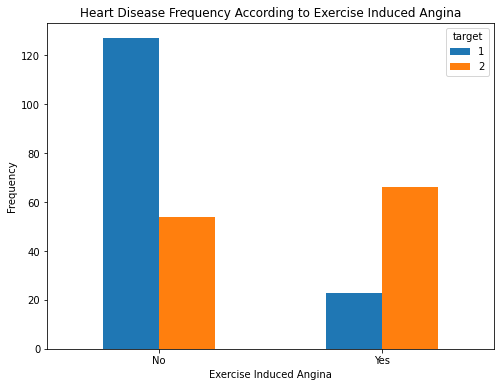

In [6]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### Major Vessel

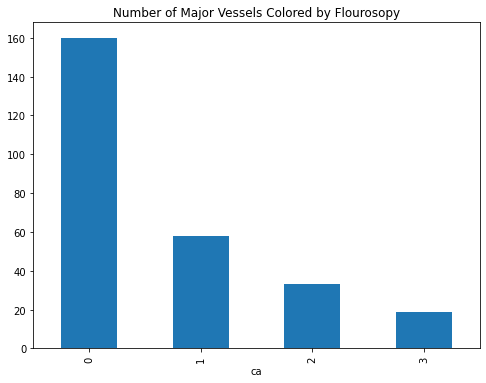

In [7]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

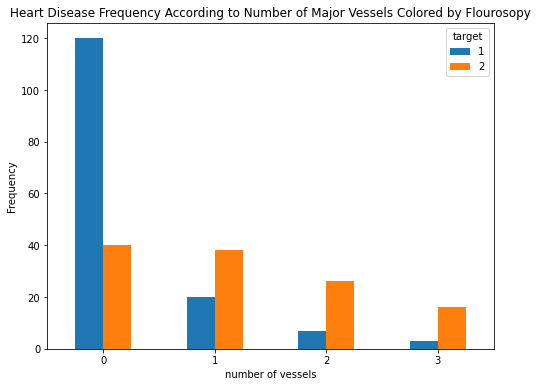

In [8]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### The people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia 

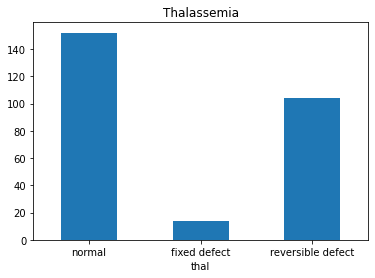

In [9]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

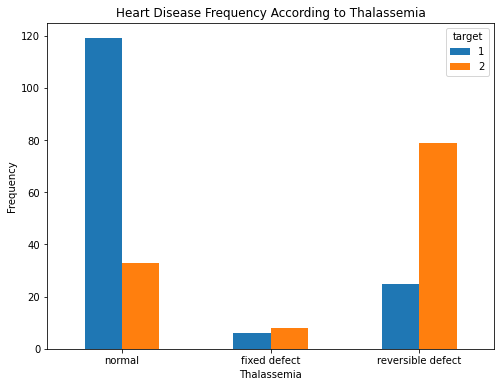

In [10]:
pd.crosstab(df.thal,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### The people with reversible defect are likely to have heart disease.

### Modeling

In [11]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [12]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [15]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [16]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [17]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [18]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           1       0.71      0.90      0.79        30
           2       0.81      0.54      0.65        24

    accuracy                           0.74        54
   macro avg       0.76      0.72      0.72        54
weighted avg       0.76      0.74      0.73        54


confusion_matrix :
[[27  3]
 [11 13]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54


confusion_matrix :
[[22  8]
 [ 7 17]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.7

#### Gradient Boosting is the best classifier

### Feature Importance

Feature: age, Score: 0.06024
Feature: sex, Score: 0.01170
Feature: cp, Score: 0.28587
Feature: trestbps, Score: 0.03719
Feature: chol, Score: 0.06007
Feature: fbs, Score: 0.00082
Feature: restecg, Score: 0.00376
Feature: thalach, Score: 0.06526
Feature: exang, Score: 0.02465
Feature: oldpeak, Score: 0.13452
Feature: slope, Score: 0.04946
Feature: ca, Score: 0.17047
Feature: thal, Score: 0.09600


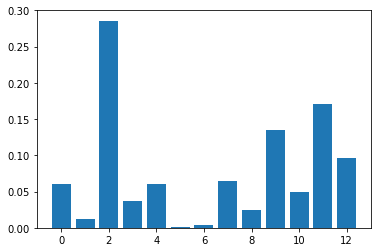

In [19]:
# get importance
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Export the model

In [22]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)